# Machine Learning Engineer Nanodegree

### Project : Using Supervised Learning to identify whether a car is worth or not on its with respect to its features.

A car with specific features and specifications is worth or not is very important to a customer.It is not a suprise that the car with particular features is very profitable for a customer.The car is not worth means that may not be safe or may be the maintenance is high and comfort is low.However, this issue become ultra-costly when the sales become less because of its unacceptability.Supervised learning deals with Regression and Classification .Classification is being implemented in different fields Ex: Medical diagnosis and this model has gained a momentum to understand the change in behaviour of the consumer so this helps business works on the data.I am trying to predict whether the car is worth or not based on its features.

In [593]:
import numpy as np
import pandas as pd
from time import time
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import learning_curve,cross_val_score,validation_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from IPython.display import display # Allows the use of display() for DataFrames


In [594]:
# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("data.csv")

# Success - Display the first record
display(data.head())

,Sales,Maintenance,Doors,Persons,lug_boot,Safety,Target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [595]:
data.describe()

,Sales,Maintenance,Doors,Persons,lug_boot,Safety,Target
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,2
top,med,med,3,more,med,med,unacc
freq,432,432,432,576,576,576,1210


### Features and Description

Sales: Level of Sales

Maintenance: Level of maintenance

Doors: Number of doors for the car

Persons: Capacity of the car

lug_boot: Size of the luggage boot

Safety: Safety level of customers

Target:This is our target variable


By observing the dataset we can see that records which are unacceptable('unacc') is more when compred to acceptable('acc') one.This will be a binomial classification and it is unbalanced since the records which are 'unacc' and 'acc' have huge difference.

### Data Exploration

In [596]:
#Total number of records
n_records = len(data)
 
i = data['Target'] == 'acc'

n_unacceptable = 0
n_acceptable = 0

for k in i:
    if k == True:
        n_acceptable = n_acceptable+1
    elif k == False:
        n_unacceptable = n_unacceptable+1
        
acceptable_percent = (n_acceptable*(1.0)/n_records)*100
unacceptable_percent = (n_unacceptable*(1.0)/n_records)*100
print("Total number of records: {}".format(n_records))
print("Number of cars acceptable are: {}".format(n_acceptable))
print("Number of cars unacceptable are: {}".format(n_unacceptable))
print("Percentage of cars that acceptable are: {}%".format(acceptable_percent))
print("Percentage of cars that unacceptable are: {}%".format(unacceptable_percent))

Total number of records: 1728
Number of cars acceptable are: 518
Number of cars unacceptable are: 1210
Percentage of cars that acceptable are: 29.9768518519%
Percentage of cars that unacceptable are: 70.0231481481%


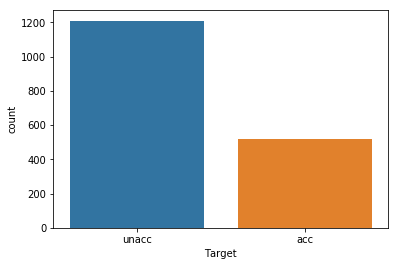

In [597]:
sns.countplot(data['Target'])

### Data Visualisation

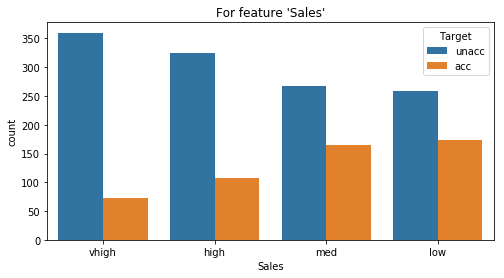

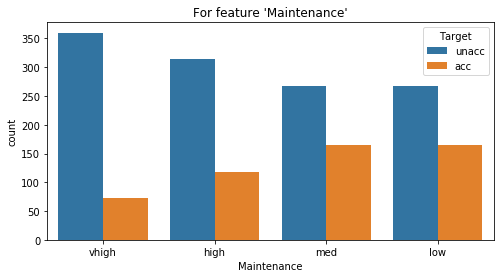

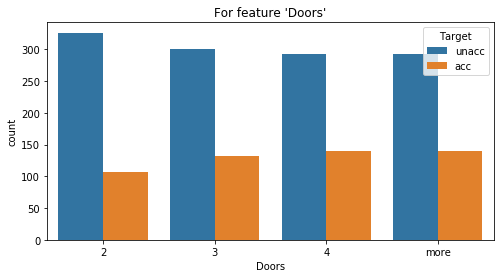

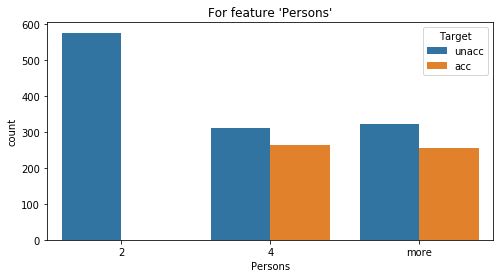

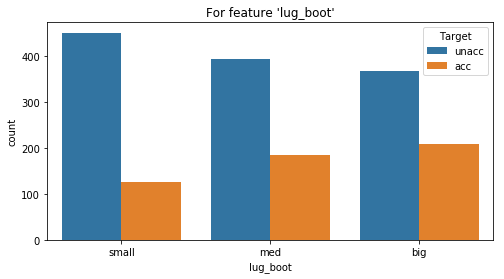

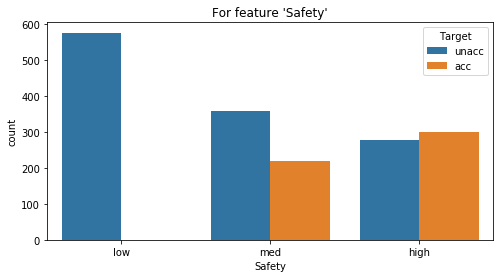

In [598]:
import matplotlib.pyplot as plt
for i in data.columns[:-1]:
    plt.figure(figsize=(8,4))
    plt.title("For feature '%s'"%i)
    sns.countplot(data[i],hue=data['Target'])

### Data Encoding 
As the dataset i am working have categorical data. I am encoding the data into numerical data using LabelEncoder.

In [599]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in data.columns:
    data[i]=encoder.fit_transform(data[i])
print(data.head())

   Sales  Maintenance  Doors  Persons  lug_boot  Safety  Target
0      3            3      0        0         2       1       1
1      3            3      0        0         2       2       1
2      3            3      0        0         2       0       1
3      3            3      0        0         1       1       1
4      3            3      0        0         1       2       1


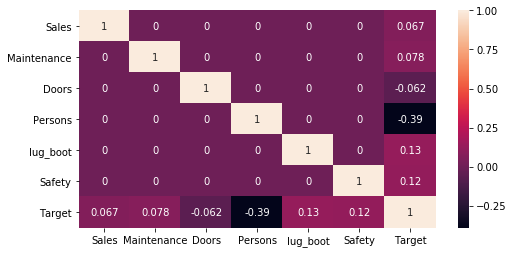

In [600]:
fig=plt.figure(figsize=(8,4))
sns.heatmap(data.corr(),annot=True)

By observing the heat map we can say that there is no correlation between all attributes.But every attribute is correlated with class label.

### Data Split

In [601]:
from sklearn.model_selection import train_test_split
X=data[data.columns[:-1]]
y=data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Benchmark Model

In [602]:
regclf=LogisticRegression(random_state=1)
regclf.fit(X_train,y_train)
pred=regclf.predict(X_test)
y_pred=regclf.predict(X_test)
f1score=f1_score(y_test,y_pred,average='weighted')
print(f1score)

0.7202992921123794


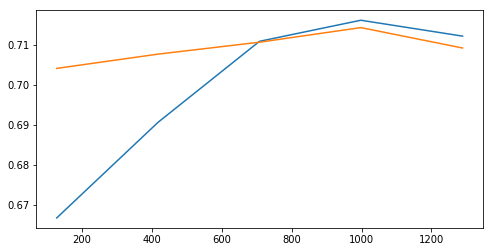

In [603]:
lcurve=learning_curve(regclf,X_train,y_train,cv=15)
size=lcurve[0]
train_score = [lcurve[1][i].mean() for i in range (0,5)]
test_score = [lcurve[2][i].mean() for i in range (0,5)]
fig = plt.figure(figsize = (8,4))
plt.plot(size,train_score)
plt.plot(size,test_score)

### K - Nearest Neighbors

In [604]:
knn=KNeighborsClassifier(n_jobs=-1)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
knn.score(X_test,y_test)

0.9393063583815029

In [605]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.92      0.83      0.87        86
          1       0.94      0.98      0.96       260

avg / total       0.94      0.94      0.94       346



### AdaBoost Classifier

0.9430640118479514


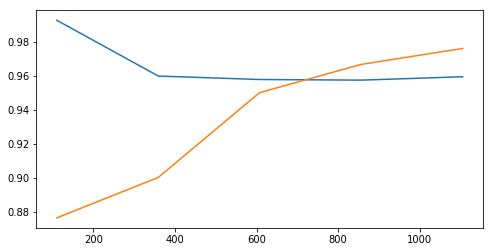

In [606]:
AdaClf=AdaBoostClassifier(random_state=1)
AdaClf.fit(X_train,y_train)
lcurve=learning_curve(AdaClf,X_train,y_train)
size=lc[0]
print(f1_score(y_test,AdaClf.predict(X_test),average='macro'))
train_score=[lcurve[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(8,4))
plt.plot(size,train_score)
plt.plot(size,test_score)

### Random Forest Classifier

0.9546189830804879


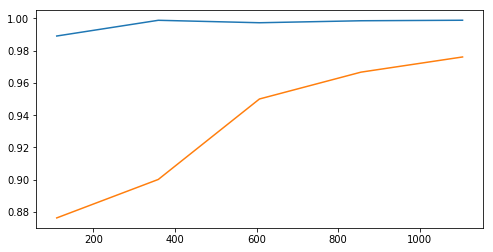

In [607]:
rfcClf=RandomForestClassifier(random_state=1)
rfcClf.fit(X_train,y_train)
lcurve=learning_curve(rfcClf,X_train,y_train)
size=lc[0]
print(f1_score(y_test,rfcClf.predict(X_test),average='macro'))
train_score=[lcurve[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(8,4))
plt.plot(size,train_score)
plt.plot(size,test_score)

### Feature Weights

[0.14150018 0.10981989 0.04839976 0.30098533 0.07131947 0.32797537]


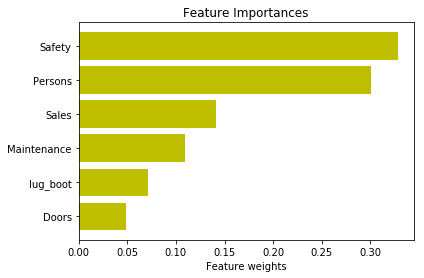

In [612]:
import numpy as np
rfc=RandomForestClassifier()
m=rfc.fit(X_train,y_train)
importances = m.feature_importances_
print(importances)
columns = X_train.columns.values
columns = [x for _,x in sorted(zip(importances,columns))]
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='y', align='center')
plt.yticks(range(len(indices)), columns)
plt.xlabel('Feature weights')
plt.show()

In [609]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X[['Sales', 'Maintenance', 'Persons', 'Safety']],
    y, test_size=0.2, random_state=1)

###  Optimised Model
By observing above all ensemble methods and other supervised learning methods we can say that Random Forest Classifier has high 
f-score when compared to other models.

I reduced the data by only considering models which are in top 4 feature weights.

I used Random Classifier model on reduced data and with max_depth=10.

In [610]:
from sklearn.model_selection import GridSearchCV
param_grid={'max_depth':[5,10,20],
           'max_features':[4,6,'auto'],
           'max_leaf_nodes':[2,3,None],}
grid=GridSearchCV(estimator=RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=29),
                  param_grid=param_grid,cv=10,n_jobs=-1)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid)

{'max_features': 6, 'max_leaf_nodes': None, 'max_depth': 10}
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=29, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_features': [4, 6, 'auto'], 'max_leaf_nodes': [2, 3, None], 'max_depth': [5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


In [611]:
rfcClf=RandomForestClassifier(max_depth=20,random_state=10,max_features=6,max_leaf_nodes=None)
rfcClf.fit(X_train,y_train)
print(f1_score(y_test,rfcClf.predict(X_test),average='macro'))

0.9773094915402438


### Conclusion

RandomForestClassifier is the best model for this data among all other models with following parameters: 'max_features': 6, 'max_leaf_nodes': None,  'max_depth': 20 and 'random_state': 10. We are getting an F1_score of 0.9773094915402438